# Capital One - Baby names
source: https://platform.stratascratch.com/data-projects/baby-names

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
states = [
    "AL",
    "AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DC",
    "DE",
    "FL",
    "GA",
    "HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

babynames = pd.DataFrame()
for i in states:
    print(f"Reading {i}.TXT")
    cur_state = pd.read_csv(
        f"./datasets/{i}.TXT",
        names=["state", "sex", "year", "name", "freq"],
    )

    babynames = pd.concat([babynames, cur_state], axis=0)

Reading AL.TXT
Reading AK.TXT
Reading AZ.TXT
Reading AR.TXT
Reading CA.TXT
Reading CO.TXT
Reading CT.TXT
Reading DC.TXT
Reading DE.TXT
Reading FL.TXT
Reading GA.TXT
Reading HI.TXT
Reading ID.TXT
Reading IL.TXT
Reading IN.TXT
Reading IA.TXT
Reading KS.TXT
Reading KY.TXT
Reading LA.TXT
Reading ME.TXT
Reading MD.TXT
Reading MA.TXT
Reading MI.TXT
Reading MN.TXT
Reading MS.TXT
Reading MO.TXT
Reading MT.TXT
Reading NE.TXT
Reading NV.TXT
Reading NH.TXT
Reading NJ.TXT
Reading NM.TXT
Reading NY.TXT
Reading NC.TXT
Reading ND.TXT
Reading OH.TXT
Reading OK.TXT
Reading OR.TXT
Reading PA.TXT
Reading RI.TXT
Reading SC.TXT
Reading SD.TXT
Reading TN.TXT
Reading TX.TXT
Reading UT.TXT
Reading VT.TXT
Reading VA.TXT
Reading WA.TXT
Reading WV.TXT
Reading WI.TXT
Reading WY.TXT


#### What is the most popular name of all time? (Of either gender.)
Answer: James

In [7]:
babynames.groupby("name", as_index=False).freq.sum().sort_values(
    "freq", ascending=False
)

,name,freq
13374,James,5054074
14747,John,4910976
25279,Robert,4763102
21365,Michael,4396482
31023,William,3939912
...,...,...
9101,Eligha,5
9107,Elijahjames,5
17235,Kohana,5
9113,Elim,5


#### What is the most gender ambiguous name in 2013? 1945?

In [ ]:
pct = (
    babynames.pivot_table(
        columns="sex",
        index=["year", "name"],
        values="freq",
        aggfunc="sum",
        fill_value=0,
    )
    .reset_index()
    .assign(
        F_pct=lambda x: x.F / (x.F + x.M),
        M_pct=lambda x: x.M / (x.F + x.M),
        min_pct=lambda x: np.minimum(x.F_pct, x.M_pct),
    )
)


sex,year,name,F,M,F_pct,M_pct,min_pct
0,1910,Aaron,0,111,0.0,1.0,0.0
1,1910,Abbie,28,0,1.0,0.0,0.0
2,1910,Abe,0,31,0.0,1.0,0.0
3,1910,Abner,0,12,0.0,1.0,0.0
4,1910,Abraham,0,138,0.0,1.0,0.0
...,...,...,...,...,...,...,...
612485,2021,Zylo,0,5,0.0,1.0,0.0
612486,2021,Zymir,0,96,0.0,1.0,0.0
612487,2021,Zyon,0,203,0.0,1.0,0.0
612488,2021,Zyra,36,0,1.0,0.0,0.0


In [ ]:
pct.query("year == 2013").nlargest(1, "min_pct", keep="all")

sex,year,name,F,M,F_pct,M_pct,min_pct
530397,2013,Arlin,5,5,0.5,0.5,0.5
531619,2013,Cree,11,11,0.5,0.5,0.5
532004,2013,Devine,10,10,0.5,0.5,0.5
536520,2013,Nikita,47,47,0.5,0.5,0.5
537808,2013,Sonam,5,5,0.5,0.5,0.5


In [15]:
pct.query("year == 1945").nlargest(1, "min_pct", keep="all")

sex,year,name,F,M,F_pct,M_pct,min_pct
117762,1945,Maxie,19,19,0.5,0.5,0.5


#### Of the names represented in the data, find the name that has had the largest percentage increase in popularity since 1980. Largest decrease?

In [ ]:
change = (
    babynames.query("year in [1980, 2021]")
    .groupby(["name", "year"], as_index=False)
    .freq.sum()
    .pivot(index="name", columns="year", values="freq")
    .reset_index()
    .rename({2021: "y2021", 1980: "y1980"}, axis=1)
    .assign(pctchg=lambda x: ((x["y2021"] - x["y1980"]) / x["y1980"]))
)

print(change.nlargest(1, "pctchg", keep="all"))
print(change.nsmallest(1, "pctchg", keep="all"))

year   name  y1980   y2021       pctchg
7685  Mateo    6.0  9100.0  1515.666667
year  name   y1980  y2021    pctchg
5375  Jill  4555.0    5.0 -0.998902


#### Can you identify names that may have had an even larger increase or decrease in popularity?

In [ ]:
change = change.assign(nchg=lambda x: x.y2021 - x.y1980)
change.nlargest(10, "nchg", keep="all")

year,name,y1980,y2021,pctchg,nchg
6932,Liam,71.0,20272.0,284.521127,20201.0
8492,Noah,899.0,19114.0,20.261402,18215.0
8625,Olivia,1092.0,17728.0,15.234432,16636.0
3576,Emma,479.0,15433.0,31.219207,14954.0
8624,Oliver,335.0,14616.0,42.629851,14281.0
1343,Ava,62.0,12759.0,204.790323,12697.0
2300,Charlotte,814.0,13285.0,15.320639,12471.0
702,Amelia,742.0,12952.0,16.455526,12210.0
3412,Elijah,731.0,12708.0,16.384405,11977.0
10258,Sophia,583.0,12496.0,20.433962,11913.0


In [ ]:
change.nsmallest(10, "nchg", keep="all")

year,name,y1980,y2021,pctchg,nchg
7899,Michael,69202.0,9041.0,-0.869353,-60161.0
5255,Jennifer,58529.0,598.0,-0.989783,-57931.0
5079,Jason,48438.0,2831.0,-0.941554,-45607.0
2406,Christopher,49357.0,5800.0,-0.882489,-43557.0
657,Amanda,35839.0,619.0,-0.982728,-35220.0
2839,David,42169.0,7843.0,-0.814010,-34326.0
5333,Jessica,33992.0,605.0,-0.982202,-33387.0
7834,Melissa,31733.0,809.0,-0.974506,-30924.0
5516,Joshua,36214.0,5457.0,-0.849312,-30757.0
7704,Matthew,37985.0,7420.0,-0.804660,-30565.0


#### New born by gender and year

<Axes: xlabel='year', ylabel='freq'>

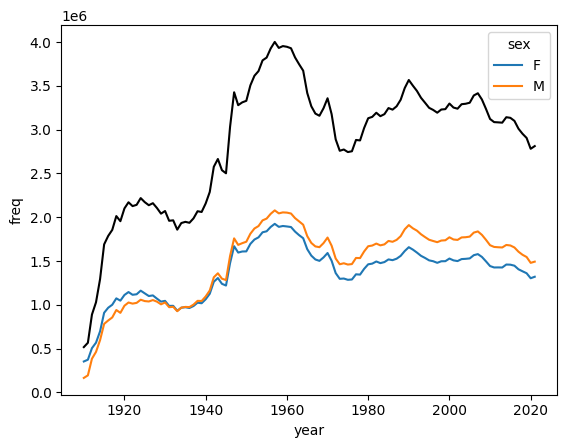

In [ ]:
yeartrend = babynames.groupby("year", as_index=False).freq.sum()
sns.lineplot(yeartrend, x="year", y="freq", color="black")
yearsextrend = babynames.groupby(["year", "sex"], as_index=False).freq.sum()
sns.lineplot(yearsextrend, x="year", y="freq", hue="sex")

#### Top states new born rate change since 1980

In [68]:
babynames.columns

Index(['state', 'sex', 'year', 'name', 'freq'], dtype='object')

In [ ]:
statechange = (
    babynames.query("year in (1980, 2021)")
    .pivot_table(index="state", columns="year", values="freq", aggfunc="sum")
    .reset_index()
    .rename({1980: "Y1980", 2021: "Y2021"}, axis=1)
    .assign(chgpct=lambda x: (x.Y2021 - x.Y1980) / x.Y1980)
)
print("State with most new born in 1980")
print(statechange.nlargest(5, "Y1980"))
print("State with most new born in 2021")
print(statechange.nlargest(5, "Y2021"))
print("States with largest new born increase")
print(statechange.nlargest(5, "chgpct"))
print("States with largest new born decrease")
print(statechange.nsmallest(5, "chgpct"))

State with most new born in 1980
year state   Y1980   Y2021    chgpct
4       CA  365974  359997 -0.016332
43      TX  253373  324401  0.280330
34      NY  212447  169218 -0.203481
14      IL  163713  101795 -0.378211
35      OH  154891  101860 -0.342376
State with most new born in 2021
year state   Y1980   Y2021    chgpct
4       CA  365974  359997 -0.016332
43      TX  253373  324401  0.280330
9       FL  111429  175115  0.571539
34      NY  212447  169218 -0.203481
38      PA  145603  103541 -0.288881
States with largest new born increase
year state   Y1980   Y2021    chgpct
33      NV    9478   21392  1.257016
9       FL  111429  175115  0.571539
3       AZ   41852   59459  0.420697
27      NC   71638   95220  0.329183
43      TX  253373  324401  0.280330
States with largest new born decrease
year state  Y1980  Y2021    chgpct
50      WY   7144   2142 -0.700168
46      VT   5889   2349 -0.601121
7       DC  13511   6064 -0.551181
49      WV  25950  12284 -0.526628
11      HI  11951